# DB-SCAN on Dataset_1.csv

## Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from queue import Queue

## Load and prepare Data

In [2]:
df = pd.read_csv("Datasets/Dataset_1.csv")

df.head()

,Unnamed: 0,x1,x2,y
0,0,4.475986,1.610147,1
1,1,0.309710,2.789669,1
2,2,4.398344,3.946847,1
3,3,-0.660853,2.801566,1
4,4,4.044945,4.343379,1


In [3]:
df = df.drop("Unnamed: 0",axis=1)

In [4]:
data = df.values
data

array([[ 4.47598583e+00,  1.61014706e+00,  1.00000000e+00],
       [ 3.09709502e-01,  2.78966933e+00,  1.00000000e+00],
       [ 4.39834359e+00,  3.94684748e+00,  1.00000000e+00],
       [-6.60852855e-01,  2.80156581e+00,  1.00000000e+00],
       [ 4.04494502e+00,  4.34337873e+00,  1.00000000e+00],
       [ 5.14274174e-01,  2.46154130e+00,  1.00000000e+00],
       [-3.28989505e-01,  2.50279054e+00,  1.00000000e+00],
       [ 5.45478671e-01,  3.28690496e+00,  1.00000000e+00],
       [-1.12324923e-01,  3.64744892e+00,  1.00000000e+00],
       [ 2.71784505e+00,  3.43041462e+00,  1.00000000e+00],
       [-5.23606634e-01,  2.91389483e+00,  1.00000000e+00],
       [ 1.34430015e+00,  2.98030637e+00,  1.00000000e+00],
       [ 2.14107914e+00,  4.66428367e+00,  1.00000000e+00],
       [ 1.61680802e+00,  3.08621975e-01,  1.00000000e+00],
       [ 4.31009910e+00,  2.17257772e+00,  1.00000000e+00],
       [-8.79285820e-01,  3.83134469e+00,  1.00000000e+00],
       [ 7.80583375e-01,  2.27155571e+00

## Visualising the data

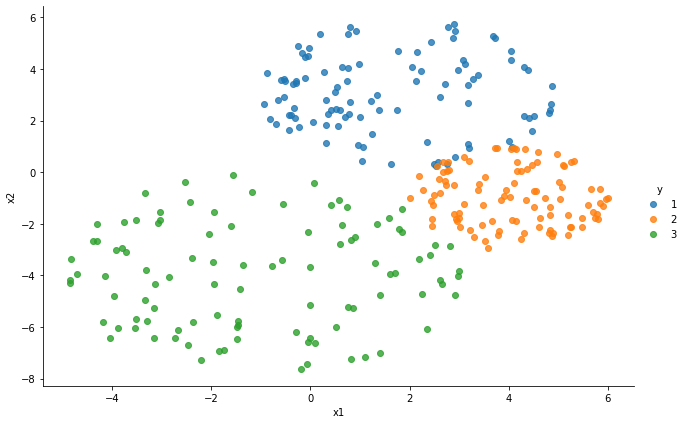

In [5]:
sns.lmplot(data= df , x = "x1" , y = "x2" , hue = "y", fit_reg = False , height = 6 , aspect = 1.5  )

## Db-Scan Algorithm

In [6]:
class dbscan2():
    def __init__(self,df, epsilon = 1, min_points = 5):
        self.df = df
        self.epsilon = epsilon
        self.min_points = min_points
        self.cluster_label = 0
        self.noise = 0
        print(self.df)
    
    # helper function
    def dist(self, point1, point2):
        x1 = point1[0]
        x2 = point2[0]
        y1 = point1[1]
        y2 = point2[1]
        
        p1 = (x1 - x2)**2
        p2 = (y1 - y2)**2
        
        return np.sqrt(p1+p2)
    
    # helper function
    def rangeQuery(self, x):
        
        neighbors = []
        
        for y in range(len(self.df)):
            q=self.df[y, :2]
            if self.dist(x, q) <= self.epsilon:
                neighbors.append(y)
                
        return neighbors
        
    def fit(self):
        
        
        self.df = np.append(self.df, np.array([[-1]*len(self.df[:,2])]).reshape(-1,1), axis = 1)
        
        for x in range(len(self.df)):
            if self.df[x,3] != -1:
                continue
                
            #find neighbours
            p = self.df[x,:2]
            neighbors = self.rangeQuery(p)
            
            # if less noise than min_points , then label as noise and coninue
            if len(neighbors) < self.min_points:
                self.df[x,3] = self.noise
                continue
                
            # increment cluster label
            self.cluster_label += 1;
            
            #set current row to new cluster label
            self.df[x,3] = self.cluster_label
            
            found_neighbors = neighbors
            
            q = Queue()
            
            # add original neighbors to queue
            for x in neighbors:
                q.put(x)
                
            # while isn't empty, label new neighbors to cluster
            while q.empty() == False:
                
                current = q.get()
                
                # if current row is labelled noise
                if self.df[current,3] == 0:
                    self.df[current,3] = self.cluster_label
                    
                #if current row is already classified
                if self.df[current,3] != -1:
                    continue
                    
                #label the neighbor
                self.df[current,3] = self.cluster_label
                
                # look for neightbors of cur_row
                point = self.df[current,:3]
                neighbors2 = self.rangeQuery(point)
                
                # if neighbors2 >= min_points then add those neighbors to seed_set
                if len(neighbors2) >= self.min_points:

                    for x in neighbors2:
                        if x not in found_neighbors:
                            q.put(x)
                            found_neighbors.append(x) 
                            
                            
    def predict(self):
        #"Return the predicted labels"
        
        preds = self.df[:,3]
        
        #for point in x:
         #   neighbors = self.rangeQuery(point)
          #  label = self.df[neighbors[0],3]
           # preds.append(label)
        
        return preds

## Fitting the data and making clusters

In [7]:
db = dbscan2(data)
db.fit()

[[ 4.47598583e+00  1.61014706e+00  1.00000000e+00]
 [ 3.09709502e-01  2.78966933e+00  1.00000000e+00]
 [ 4.39834359e+00  3.94684748e+00  1.00000000e+00]
 [-6.60852855e-01  2.80156581e+00  1.00000000e+00]
 [ 4.04494502e+00  4.34337873e+00  1.00000000e+00]
 [ 5.14274174e-01  2.46154130e+00  1.00000000e+00]
 [-3.28989505e-01  2.50279054e+00  1.00000000e+00]
 [ 5.45478671e-01  3.28690496e+00  1.00000000e+00]
 [-1.12324923e-01  3.64744892e+00  1.00000000e+00]
 [ 2.71784505e+00  3.43041462e+00  1.00000000e+00]
 [-5.23606634e-01  2.91389483e+00  1.00000000e+00]
 [ 1.34430015e+00  2.98030637e+00  1.00000000e+00]
 [ 2.14107914e+00  4.66428367e+00  1.00000000e+00]
 [ 1.61680802e+00  3.08621975e-01  1.00000000e+00]
 [ 4.31009910e+00  2.17257772e+00  1.00000000e+00]
 [-8.79285820e-01  3.83134469e+00  1.00000000e+00]
 [ 7.80583375e-01  2.27155571e+00  1.00000000e+00]
 [ 9.21391380e-01  5.45709713e+00  1.00000000e+00]
 [ 7.40516871e-01  3.54514133e+00  1.00000000e+00]
 [ 3.68910408e+00  5.26715764e+

In [8]:
preds = db.predict()
df["y_pred"] = preds
preds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
       2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2.,
       1., 2., 2., 1., 2.

## Visualising the clusters

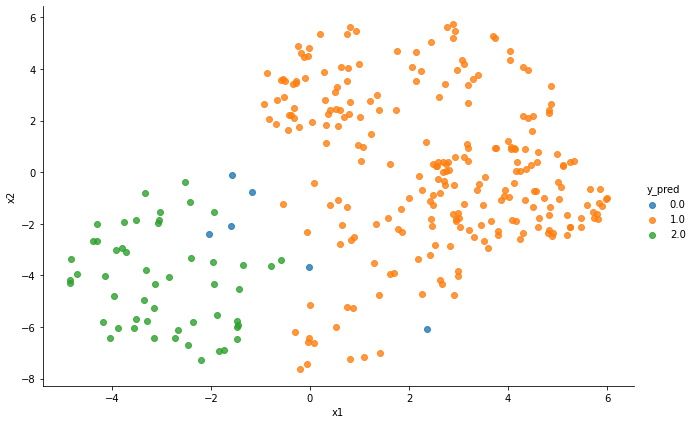

In [9]:
sns.lmplot(data= df , x = "x1" , y = "x2" , hue = "y_pred", fit_reg = False , height = 6 , aspect = 1.5  )